In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib.colors import ListedColormap

In [2]:
all_samples = pd.read_pickle('/ghds/groups/labdesk/bshih/c19dash/c19_dashboard/c19_read_counts.pickle').dropna(subset=['pos_tube_rack'])

all_samples['RBP'] = all_samples.pos_tube_rack.str[:13]
all_samples['primer_plate'] = all_samples.pos_extraction.str[:13]
all_samples['row'] = all_samples.pos_extraction.str[14]
all_samples['column'] = all_samples.pos_extraction.str[15:].astype('int')

RBP = ['RBP201112A249',
'RBP201112A250']

all_samples = all_samples[all_samples['RBP'].isin(RBP)].sort_values(by='RBP')

## 201231_EXP22_SpittoonStudySTAR10Repeat_VolTolerance
RBP = ['RBP201112A249',
'RBP201112A250']
\
RBP201112A249 = Volume Tolerance\
RBP201112A250 = STAR10 Repeat

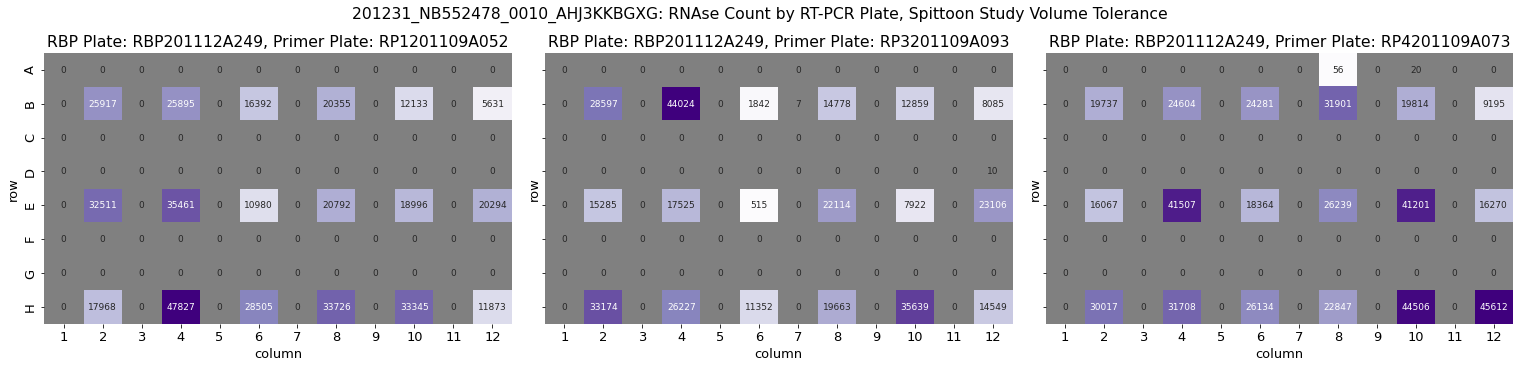

In [3]:
total_cols = 3
total_rows = 1
plt.rcParams['font.size'] = '13'
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, sharex=True, sharey=True, 
                        figsize=(7*total_cols, 5*total_rows), constrained_layout=True, squeeze=False)

fig.suptitle(f'{all_samples.iloc[0,0]}: RNAse Count by RT-PCR Plate, Spittoon Study Volume Tolerance')
fig.set_facecolor('white')

sub_RBP = all_samples[all_samples['RBP'] == RBP[0]].sort_values(by='primer_plate')
    
for l,m in zip(sub_RBP.primer_plate.unique(), range(3)):
    sub_primer = sub_RBP[sub_RBP['primer_plate'] == l]
    sub_primer.rnase_count.astype('int64')

    plate_map = sub_primer.loc[:, ['row', 'column', 'rnase_count']].pivot(index='row', columns='column', values='rnase_count').fillna(0)

    plate_map = plate_map.astype(dtype='int')

    row = 0
    pos = m % total_cols

    fig = sns.heatmap(plate_map, annot=True, cbar=False, cmap="Purples", 
                vmin=500, fmt='d', annot_kws={"fontsize":9}, ax=axs[row][pos])

    fig = sns.heatmap(plate_map, mask=plate_map > 50, cmap=ListedColormap(['grey']), annot=False, ax=axs[row][pos], cbar=False)

    axs[row][pos].set_title(f'RBP Plate: {RBP[0]}, Primer Plate: {l}')
            
# plt.savefig('spittoonstudyVolumeTolerance', dpi=300)


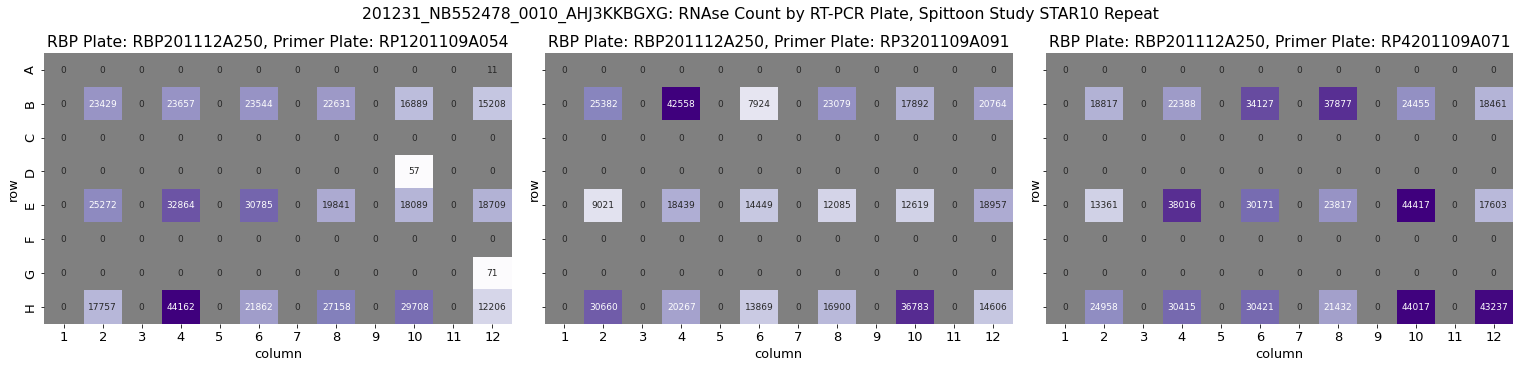

In [4]:
total_cols = 3
total_rows = 1
plt.rcParams['font.size'] = '13'
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols, sharex=True, sharey=True, 
                        figsize=(7*total_cols, 5*total_rows), constrained_layout=True, squeeze=False)

fig.suptitle(f'{all_samples.iloc[0,0]}: RNAse Count by RT-PCR Plate, Spittoon Study STAR10 Repeat')
fig.set_facecolor('white')

sub_RBP = all_samples[all_samples['RBP'] == RBP[1]].sort_values(by='primer_plate')
    
for l,m in zip(sub_RBP.primer_plate.unique(), range(3)):
    sub_primer = sub_RBP[sub_RBP['primer_plate'] == l]
    sub_primer.rnase_count.astype('int64')

    plate_map = sub_primer.loc[:, ['row', 'column', 'rnase_count']].pivot(index='row', columns='column', values='rnase_count').fillna(0)

    plate_map = plate_map.astype(dtype='int')

    row = 0
    pos = m % total_cols

    fig = sns.heatmap(plate_map, annot=True, cbar=False, cmap="Purples", 
                vmin=500, fmt='d', annot_kws={"fontsize":9}, ax=axs[row][pos])

    fig = sns.heatmap(plate_map, mask=plate_map > 50, cmap=ListedColormap(['grey']), annot=False, ax=axs[row][pos], cbar=False)

    axs[row][pos].set_title(f'RBP Plate: {RBP[1]}, Primer Plate: {l}')
            
# plt.savefig('spittoonstudySTAR10Repeat', dpi=300)


In [5]:
all_samples[all_samples['run_sample_id'].str.contains(r'\d{14}')]\
.loc[:, ['run_sample_id', 'RBP', 'row', 'column']].sort_values(by=['RBP', 'row', 'column']).drop_duplicates()

,run_sample_id,RBP,row,column
2115,55052006560509,RBP201112A249,B,2
1994,55052006560460,RBP201112A249,B,4
2205,55052006560729,RBP201112A249,B,6
2132,55052006561392,RBP201112A249,B,8
2002,55052006560642,RBP201112A249,B,10
2027,55052006560696,RBP201112A249,B,12
2226,55052006560464,RBP201112A249,E,2
1989,55052006560519,RBP201112A249,E,4
2116,55052006560676,RBP201112A249,E,6
2168,55052006561332,RBP201112A249,E,8
